In [2]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
from imutils.video import FPS
import time
from PIL import Image

In [7]:
# importing the pretrained model
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 'MobileNetSSD_deploy.caffemodel')
print("[INFO] model loaded...")

[INFO] loading model...
[INFO] model loaded...


In [4]:
# Defining the total classes in which model is trained
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", 
           "bottle","bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]
# Giving random colors to each class
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [5]:

# Object detection function
def object_detection(image):
#     size of image
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
    # pass the blob through the network and obtain the detections and
    # predictions
    print("[INFO] computing object detections...")
    net.setInput(blob)
    detections = net.forward()
    # loop over the detections
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > .60:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            # display the prediction
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(image, (startX, startY), (endX, endY),
                          COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
    return image

[INFO] computing object detections...
[INFO] person: 99.49%
[INFO] car: 89.26%
[INFO] dog: 73.06%


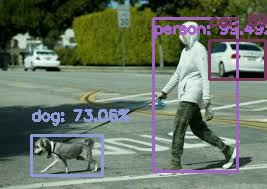

In [6]:
img=cv2.imread('car_dog_person.jpg')
image=object_detection(img)
# ploting image after detection
cv2.imwrite('result1.jpg',image)
Image.open('result1.jpg')